This notebook shows the Boston Housing task solved with Keras (dense DL-network with 2 hidden layers).
From [Frochte19, p. 210ff](https://joerg.frochte.de/books/ "Frochte ML-book").

With a few add-ons WK: alternative ways to load the data, comparison of data with Pandas' `describe()`.

# Required Libraries

In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import keras


# Load Boston Houing


Two ways to get the Boston Housing data into Google Colab:


1.  In the next cell we mount our own Google drive, where two CSV files have been uploaded, then load the data from there (on first pass, an authorization code will be asked)
2.  In the cell thereafter we load the data via keras.datasets
3.  In both cases, we normalize the target variable to [0,1]





In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
### then use prefix '/content/gdrive/My Drive/' in front of filename (!)
np.random.seed(42)
fFloat  = open("/content/gdrive/My Drive/WPF DLML/src/BostonFeature.csv","r")
X = np.loadtxt(fFloat, delimiter=","); fFloat.close()
fFloat  = open("/content/gdrive/My Drive/WPF DLML/src/BostonTarget.csv","r")
Y = np.loadtxt(fFloat, delimiter=","); fFloat.close()
yMin = Y.min(axis=0); yMax = Y.max(axis=0) 
#Y = (Y - yMin) / (yMax - yMin) 
TrainSet     = np.random.choice(X.shape[0],int(X.shape[0]*0.80), replace=False)
XTrain       = X[TrainSet,:] 
YTrain       = Y[TrainSet]
TestSet      = np.delete(np.arange(0, len(Y) ), TrainSet) 
XTest        = X[TestSet,:]
YTest        = Y[TestSet]
print(f'Training data : {XTrain.shape}')
print(f'Test data : {XTest.shape}')
print(f'Training input sample : {X[0]}')
print(f'Training target sample : {Y[0]}')
print(yMin,yMax);
YTrain = (YTrain-yMin)/(yMax-yMin)
YTest = (YTest-yMin)/(yMax-yMin)
print(all(0<=YTrain),all(YTrain<=1))
print(all(0<=YTest),all(YTest<=1))


Mounted at /content/gdrive
Training data : (404, 13)
Test data : (102, 13)
Training input sample : [6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]
Training target sample : 24.0
5.0 50.0
True True
True True


In [3]:
from keras.datasets import boston_housing
(XTrain, YTrain), (XTest, YTest) = boston_housing.load_data()
print(f'Training data : {XTrain.shape}')
print(f'Test data : {XTest.shape}')
print(f'Training sample : {XTrain[0]}')
print(f'Training target sample : {YTrain[0:5]}')
yMin = min(YTrain.min(axis=0),YTest.min(axis=0))
yMax = max(YTrain.max(axis=0),YTest.max(axis=0))
print(yMin,yMax);
YTrain = (YTrain-yMin)/(yMax-yMin)
YTest = (YTest-yMin)/(yMax-yMin)
print(all(0<=YTrain),all(YTrain<=1))
print(all(0<=YTest),all(YTest<=1))

65536/57026 [==================================] - 0s 0us/step
Training data : (404, 13)
Test data : (102, 13)
Training sample : [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
Training target sample : [15.2 42.3 50.  21.1 17.7]
5.0 50.0
True True
True True


A third possibility would be to import it from sklearn.datasets:

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)
print(boston.target.shape)

(506, 13)
(506,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

The following cell just checks that the Boston Housing data read in one of the three ways are statistically identical: 


1.   Note that we have to concatenate in the 2nd form both np-arrays into one with 506 rows. 





In [ ]:
df = pd.DataFrame(X,columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
print(df.describe())
df2 = pd.DataFrame(np.concatenate((XTrain,XTest)),columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
print(df2.describe())
#df3 = pd.DataFrame(boston.data,columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
#print(df3.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

# Build DL-NN

## Build the Network

In [ ]:
USE_BIAS=True
myANN = Sequential()
myANN.add(Dense(10,input_dim=13,kernel_initializer='normal',activation='relu',use_bias=USE_BIAS))
myANN.add(Dense(10,kernel_initializer='random_uniform',activation='relu',use_bias=USE_BIAS))
myANN.add(Dense(1,kernel_initializer='normal',activation='linear',use_bias=USE_BIAS))
myANN.compile(loss='mean_squared_error', optimizer='adam')
history = myANN.fit(???)


## Visualize Training Results

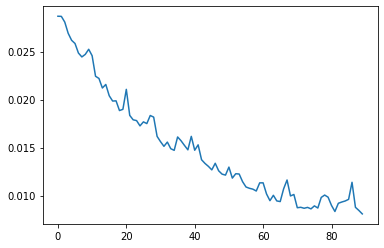

In [ ]:
import matplotlib.pyplot as plt
lossMonitor = np.array(history.history['loss'])[10:]
counts = np.arange(lossMonitor.shape[0])
# a simple plot:
plt.plot(lossMonitor);

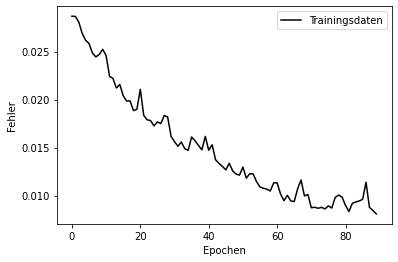

In [ ]:
# a bit more advanced plot
plt.plot(counts,lossMonitor,'k', label='Trainingsdaten')
plt.xlabel('Epochen')
plt.ylabel('Fehler')
plt.legend();

## Evaluate on Test Set

In [ ]:
yp2 = myANN.predict(XTest)            # a (102,1)-array
yp = yp2.reshape(yp2.shape[0])        # reformat to (102)-vector
errorT = (yMax - yMin)*(yp - YTest)
print(f'Test MAE : {np.mean(np.abs(errorT))}')
#print(yp2.shape)
#print(YTest.shape)
#print(yp2[0:6,0:1])

yp = myANN.predict(XTrain)
yp = yp.reshape(yp.shape[0])
error = (yMax - yMin)*(yp - YTrain)
print(f'Train MAE : {np.mean(np.abs(error))}')

Test MAE : 4.100624885979822
Train MAE : 2.9687190729829647


## Callbacks

Now we start a 2nd try, where we want to stop, once the error on vali-set starts to increase

In [ ]:
USE_BIAS=True
myANN2 = Sequential()
myANN2.add(Dense(10,input_dim=13,kernel_initializer='normal',activation='relu',use_bias=USE_BIAS))
myANN2.add(Dense(10,kernel_initializer='random_uniform',activation='relu',use_bias=USE_BIAS))
#myANN2.add(Dense(30,kernel_initializer='random_uniform',activation='relu',use_bias=USE_BIAS))
myANN2.add(Dense(1,kernel_initializer='normal',activation='linear',use_bias=USE_BIAS))
myANN2.compile(loss='mean_squared_error', optimizer='adam',metrics=['mae'])

def divValTrainSet(X,Y):
    ValSet    = np.random.choice(Y.shape[0],int(Y.shape[0]*0.25),replace=False)
                # draw a uniform random sample with 2nd arg many elements from 0,...,Y.shape[0]. Draw w/o replacement.
    TrainSet  = np.delete(np.arange(0, Y.shape[0] ), ValSet) # delete ValSet from 0,...,Y.shape[0]
    XVal     = X[ValSet,:]
    YVal     = Y[ValSet]
    X        = X[TrainSet,:]
    Y        = Y[TrainSet]
    return (XVal, YVal, X, Y)
  
np.random.seed(42)
(XVal, YVal, XTr, YTr) = divValTrainSet(XTrain,YTrain)

earlystop  = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=False)
checkpoint = keras.callbacks.ModelCheckpoint('bestW.h5', monitor='val_loss', verbose=False, save_weights_only=True, save_best_only=True)
callbacksList = ??? 

history2 = myANN2.fit(???)

fLoss=np.array(history2.history['loss'])[-1]
print(f'Final training loss : {fLoss}')

In [ ]:
#print(myANN.metrics_names)

Visualize train **and** validation loss during training history

In [ ]:
import matplotlib.pyplot as plt
lossMonitor = np.array(history.history['loss'])[10:]
valLossMonitor = np.array(history.history['val_loss'])[10:]
#
# ??? add your code here to generate the plot ???
# 

## Evaluate on Test Set Again

Observe the difference if you use the last model or the checkpoint model

In [ ]:
#myANN.evaluate(XTest,YTest)

#myANN.load_weights('bestW.h5')     # first print error with this line commented out, then in. Observe the difference
yp = myANN.predict(XTest)
yp = yp.reshape(yp.shape[0])
errorT = (yMax - yMin)*(yp - YTest)
print(f'Test MAE : {np.mean(np.abs(errorT))}')

yp = myANN.predict(XTrain)
yp = yp.reshape(yp.shape[0])
error = (yMax - yMin)*(yp - YTrain)
MAE = np.mean(np.abs(error))
print(f'Train MAE : {MAE}')

print(np.where(valLossMonitor==np.min(valLossMonitor))[0])

## Warning on Early Stopping

Early stopping is a great thing to save computation time, but be careful with the parameter `patience`. If it is too small, the training may stop too early whenever -- due to noise or random fluctuations -- the val-loss is worse on `patience` consectuive episodes **by chance**, but not on the long run.

You should check, if a **larger value** for patience or a **fixed number of episodes twice as big** as the early-stop point gives similar results.

On the other hand, the callback `checkpoint` is always an improvement.

## Error Distribution Plot

(just another plot)

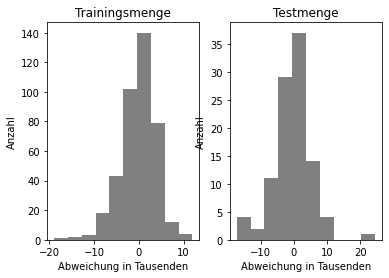

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.set_title('Trainingsmenge')
ax.hist(error,color='gray')
ax.set_xlabel('Abweichung in Tausenden')
ax.set_ylabel('Anzahl')
ax = fig.add_subplot(1,2,2)
ax.set_title('Testmenge')
ax.hist(errorT,color='gray')
ax.set_xlabel('Abweichung in Tausenden')
ax.set_ylabel('Anzahl');     # ';' is here to suppress the printed output of last statement